# Practice Case : Time Series
## Analyzed by Dwilaras Athina

## The Concept of Time Series
### By: Mingda Zhang, University of Pittsburgh, 2018

![About Time Series](1.jpg)

![Components of Time Series](2.jpg)

![](3.jpg)

![](4.jpg)

![](5.jpg)

## EXTRACT DATA

In [10]:
#Explore dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#read the data
df= pd.read_csv('tute1.csv')

#rename columns
df.rename(columns={'Unnamed: 0':'Month'}, 
                 inplace=True)

#changing datetime from object 
f = "%b-%y"
df['Month'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x, f))
df=df.set_index(['Month'])
df=df.drop(columns=['AdBudget', 'GDP'])

## Exploratory Data Analysis

In [11]:
df.head(10)

,Sales
Month,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7
1982-06-01,944.4
1982-09-01,778.5
1982-12-01,932.5
1983-03-01,996.5


In [12]:
df.tail(10)

,Sales
Month,
2003-09-01,957.3
2003-12-01,1059.5
2004-03-01,1090.6
2004-06-01,998.9
2004-09-01,866.6
2004-12-01,1018.7
2005-03-01,1112.5
2005-06-01,997.4
2005-09-01,826.8


In [13]:
df.describe()

,Sales
count,100.000000
mean,948.737000
std,98.252187
min,735.100000
25%,871.100000
50%,960.650000
75%,1018.700000
max,1115.500000


In [9]:
df.isnull().sum()

Sales    0
dtype: int64

Text(0,0.5,'Sales')

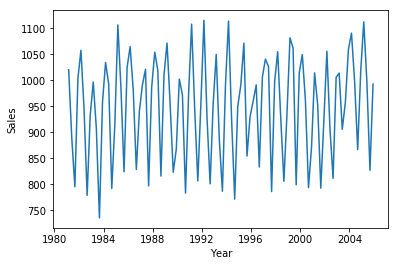

In [3]:
# Plot Graph
plt.plot(df['Sales'])
plt.xlabel("Year")
plt.ylabel("Sales")

After the sales values is plotted, we can see the data is not stationary in mean and variances. To cope with this case, we determine rolling statistics and perform Dickey-Fuller test. See the explanation from Mingda Zhang below. 

![](6.jpg)

In [14]:
#Determining rolling statistics
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean,rolstd)

                 Sales
Month                 
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
1982-06-01         NaN
1982-09-01         NaN
1982-12-01         NaN
1983-03-01         NaN
1983-06-01         NaN
1983-09-01         NaN
1983-12-01  918.233333
1984-03-01  919.391667
1984-06-01  928.025000
1984-09-01  927.750000
1984-12-01  920.275000
1985-03-01  924.341667
1985-06-01  927.733333
1985-09-01  931.516667
1985-12-01  939.233333
1986-03-01  944.916667
1986-06-01  951.100000
1986-09-01  958.866667
1986-12-01  957.416667
1987-03-01  953.833333
1987-06-01  956.200000
1987-09-01  956.616667
1987-12-01  962.650000
1988-03-01  958.291667
1988-06-01  961.091667
...                ...
1998-09-01  946.350000
1998-12-01  946.708333
1999-03-01  956.883333
1999-06-01  962.816667
1999-09-01  959.975000
1999-12-01  960.658333
2000-03-01  961.391667
2000-06-01  956.008333
2000-09-01  956.633333
2000-12-01  946.191667
2001-03-01 

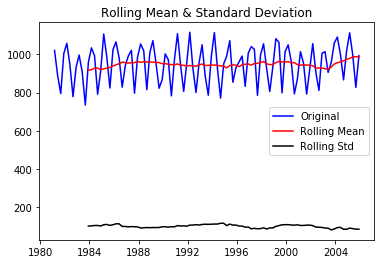

In [15]:
#Plot rolling statistics:
orig = plt.plot(df, color='blue', label='Original')
mean = plt.plot(rolmean,color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [16]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We can see from the results of Dickey Fuller Test. The p-value is 0.016 < 0.05

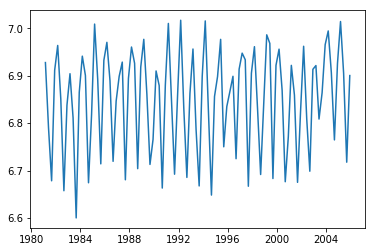

In [17]:
#Estimating trend
indexedDataset_logScale = np.log(df)
plt.plot(indexedDataset_logScale)

![](7.jpg)

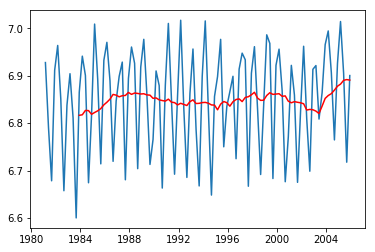

In [18]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [20]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(15)

,Sales
Month,
1981-03-01,NaN
1981-06-01,NaN
1981-09-01,NaN
1981-12-01,NaN
1982-03-01,NaN
1982-06-01,NaN
1982-09-01,NaN
1982-12-01,NaN
1983-03-01,NaN


Because there is no missing data handling in ARIMA, SARIMAX and related time series models, we have to remove all nan values from our dataset

In [21]:
# Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Sales
Month,
1983-12-01,0.048467
1984-03-01,0.123673
1984-06-01,0.073732
1984-09-01,-0.152268
1984-12-01,-0.000601
1985-03-01,0.186548
1985-06-01,0.066817
1985-09-01,-0.116600
1985-12-01,0.094007


In [22]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  #Determing rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  
  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  
  #Perform Dickey-Fuller test:
  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['Sales'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

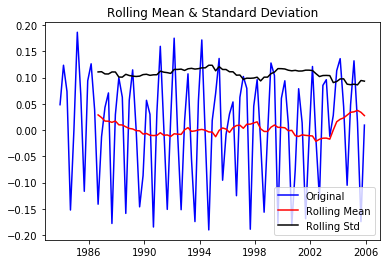

Result of Dickey-Fuller Test:
Test Statistic                 -3.821558
p-value                         0.002694
#Lag Used                       9.000000
Number of Observations Used    79.000000
Critical Value (1%)            -3.515977
Critical Value (5%)            -2.898886
Critical Value (10%)           -2.586694
dtype: float64


In [23]:
test_stationarity(datasetLogScaleMinusMovingAverage)

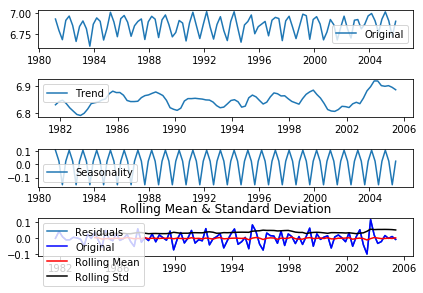

Result of Dickey-Fuller Test:
Test Statistic                -6.204835e+00
p-value                        5.690975e-08
#Lag Used                      8.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [55]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

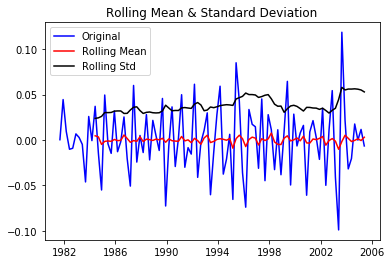

Result of Dickey-Fuller Test:
Test Statistic                -6.204835e+00
p-value                        5.690975e-08
#Lag Used                      8.000000e+00
Number of Observations Used    8.700000e+01
Critical Value (1%)           -3.507853e+00
Critical Value (5%)           -2.895382e+00
Critical Value (10%)          -2.584824e+00
dtype: float64


In [56]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

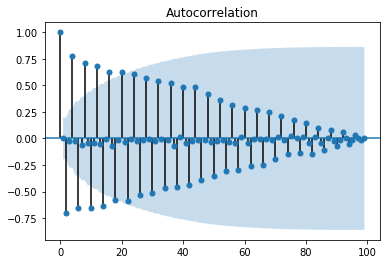

In [57]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = df
plot_acf(series)
pyplot.show()

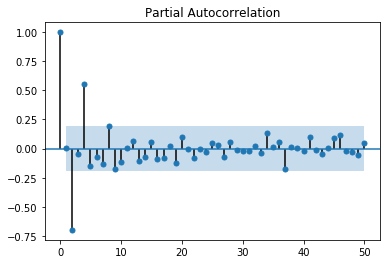

In [58]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
series = df
plot_pacf(series, lags=50)
pyplot.show()

## Arima (4,0,2)

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\

Plotting AR model


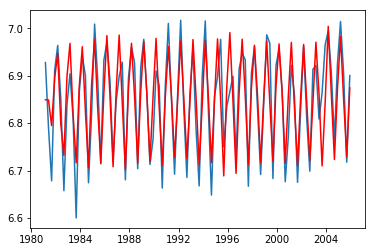

In [22]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(4,0,2))
results_AR = model.fit(disp=-1)
plt.plot(indexedDataset_logScale)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Sales"])**2))
print('Plotting AR model')

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


[]

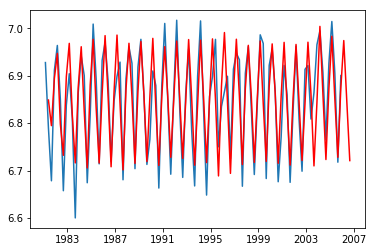

In [23]:
#Prediction for the next three months

plt.plot(indexedDataset_logScale)
plt.plot(results_AR.predict(1,102), color='red')
plt.plot()

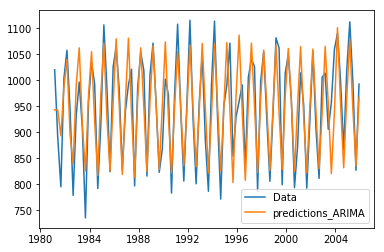

In [40]:
predictions_ARIMA = np.exp(results_AR.fittedvalues)



#plt.plot(df)
plt.plot(df, label='Data')
#plt.plot(indexedDataset_logScale, label='Data')

#plt.plot(predictions_ARIMA)
plt.plot(predictions_ARIMA, label='predictions_ARIMA')
plt.legend(loc='best')

In [41]:
def rmse(predictions_ARIMA, df):
    #return np.sqrt(((predictions_ARIMA - df) ** 2).mean())
    return np.sqrt(np.mean((predictions_ARIMA - df)**2))

In [42]:
#RMSE
rmse(predictions_ARIMA, df['Sales'])

51.926310824777204

In [43]:
#MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(df, predictions_ARIMA)

11.421212875432143

## ARIMA (2,0,4)

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\

Plotting AR model


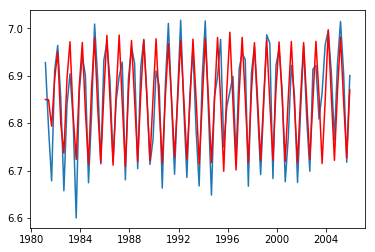

In [60]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2,0,4))
results_AR = model.fit(disp=-1)
plt.plot(indexedDataset_logScale)
plt.plot(results_AR.fittedvalues, color='red')
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Sales"])**2))
print('Plotting AR model')

C:\Users\dwilar064174\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


[]

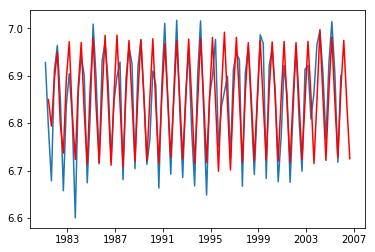

In [61]:
#Prediction for the next three months

plt.plot(indexedDataset_logScale)
plt.plot(results_AR.predict(1,102), color='red')
plt.plot()

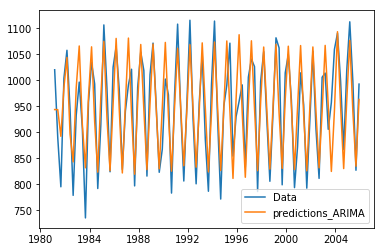

In [62]:
predictions_ARIMA = np.exp(results_AR.fittedvalues)

#plt.plot(df)
plt.plot(df, label='Data')
#plt.plot(indexedDataset_logScale, label='Data')

#plt.plot(predictions_ARIMA)
plt.plot(predictions_ARIMA, label='predictions_ARIMA')
plt.legend(loc='best')

In [64]:
#RMSE

def rmse(predictions_ARIMA, df):
    #return np.sqrt(((predictions_ARIMA - df) ** 2).mean())
    return np.sqrt(np.mean((predictions_ARIMA - df)**2))

rmse(predictions_ARIMA, df['Sales'])

52.34459604779937

In [65]:
#MAPE

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mean_absolute_percentage_error(df, predictions_ARIMA)

11.427263363233237

## Result

From ARIMA (4,0,2) and (2,0,4) we can see that the prediction for the next three months. 
If we consider with the MAPE, ARIMA (4,0,2) is better than ARIMA (2,0,4).  